# Simple Linear Regression
We are first starting by limiting it to one X feature. We will see how it can then be built upon, which is why we would need scktlearn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Step 1 and 2: Data Engineering and Cleaning and organizing data

Since we only can use one feature, create (engineer) a single feature, and let sales be the label

In [6]:
df['total_spend'] = df['TV'] + df['radio'] +df['newspaper']

In [7]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


# Step 3: Exploratory Data Analysis

Can visualize the scattered data

<Axes: xlabel='total_spend', ylabel='sales'>

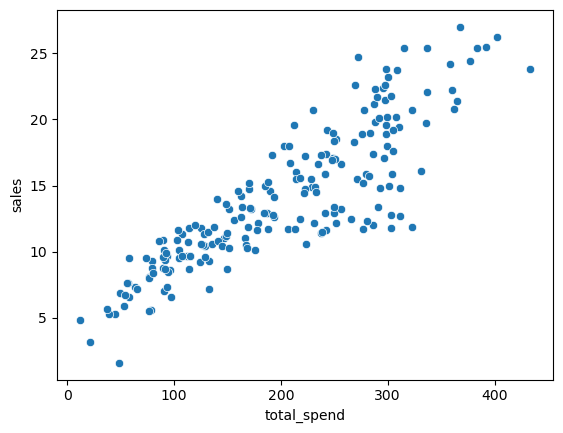

In [8]:
sns.scatterplot(data = df, x='total_spend', y='sales')

or the regression line plot

<Axes: xlabel='total_spend', ylabel='sales'>

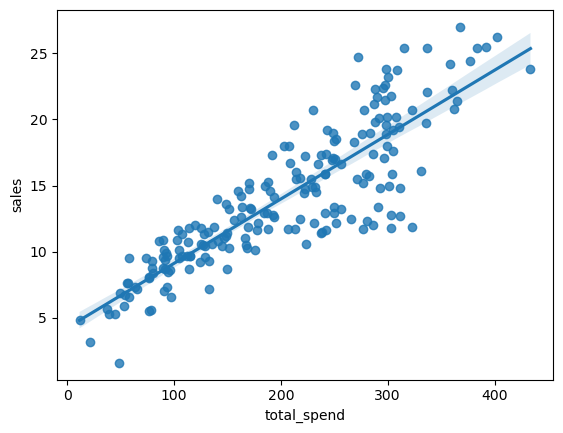

In [9]:
sns.regplot(data=df, x='total_spend', y='sales')

Let's actually code this line using the OLS (ordinary least square) method. The basis of the mental map was we defined an error function: avg cost = 1/n * Summation from 1 to n of (predicted y - actual y)^2, then we replaced defined y with predicted y with its expected form, derived and set the solution to 0 to solve for the proper coefficients

In [12]:
X = df['total_spend']
y = df['sales']

In [ ]:
# polyfit() Supposed to give you the solution of the coefficients for y = B1x + B0
# Degree tells you how the prediction line is going to look (1 = linear, 2 = arc)
# Returned in order of highest order -> least order
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [14]:
potential_spend = np.linspace(0,500,100)

In [ ]:
predicted_sales = np.polyfit(X, y, deg=1)[0] * potential_spend + np.polyfit(X, y, deg=1)[1]

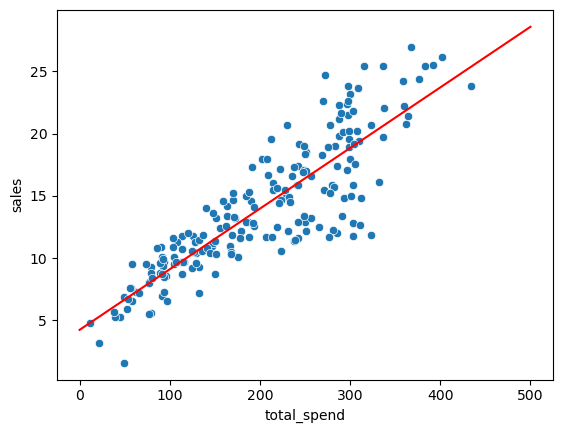

In [18]:
sns.scatterplot(data = df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color = 'red')

In [20]:
spend = 400
predicted_sales = np.polyfit(X, y, deg=1)[0] * spend + np.polyfit(X, y, deg=1)[1]
predicted_sales

23.718179943655585

Notice how we have just created this prediction line, but we need to quantify how well it is doing, that's why we need training sets. 